In [1]:
# Import the libraries
import os
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format ='retina'
import spotipy
import spotipy.util as util
from spotipy.oauth2 import SpotifyClientCredentials

In [2]:
# Declare the credentials
client_id = '2a7adde1b07a4bf9a5fd750d6ff6f28d'
client_secret = '74a5c5859a0548ccae791419cc29c8fa'
redirect_uri='http://localhost:7777/callback'
username = 'ethan.falcao'

In [3]:
# Authorization flow
scope = 'user-top-read'
token = util.prompt_for_user_token(username, scope, client_id=client_id, client_secret=client_secret, redirect_uri=redirect_uri)

if token:
    sp = spotipy.Spotify(auth=token)
else:
    print("Can't get token for", username)

#### Initialize the Spotify Artist 

In [4]:
#input artist uri 

#vowel gang is our test 
artist_uri = '2YpbfG8YXAbcNHagReUjNX'

# Get all albums from the artist
albums = sp.artist_albums(artist_uri)

In [5]:
# List to store track IDs
track_ids = []
# Loop through albums and get track IDs
for album in albums['items']:
    album_id = album['id']
    
    # Get tracks from the album
    tracks = sp.album_tracks(album_id)
    
    # Extract and append track IDs
    for track in tracks['items']:
        track_id = track['id']
        track_ids.append(track_id)

In [6]:
track_ids

['3M6em67SByKjgQnZyzcsex',
 '45VB5XNJQU6B11U6t1BZ0z',
 '1nbZLIUyrBpE2o1HVxIpun',
 '3hPjUfWrp9iMPhG4Z2qCQk',
 '2YTdnyCKNs1vqNgNaQd5YY',
 '3dItx6JrA1Ot72hAKjeebR',
 '4D0ecgUGEEHYNBoXAcQfcL',
 '1MDJamSqCj2Em1AFsTGWlO',
 '3GkKTAOxF80V91LkutANrl',
 '6VCONXk25lh3FOGmCvG3nz',
 '0y7GiY1q9FJqCWJw7seHtb',
 '2AIGAn1eTbonFQTWqgnQl0',
 '6JYPt5mGboBwBWjs2Fk97n',
 '0gNpwSDPCgsU1ihRmcpjp7',
 '3Mdqq45yVImKKQRz3EeiiI',
 '3fsPrb0e9gxkRDb56Kiv7V',
 '38HeVt28RzZPAZuoUjxj5Y',
 '61dJ4j2MM1644qvINUbLhF',
 '3L59iKLfkChzBV77PMo7DH']

In [7]:
len(track_ids)

19

In [8]:
def fetch_audio_features(sp, track_ids):
    # Make the API request
    audio_features = []
    index = 0
    while index < len(track_ids):
        audio_features += sp.audio_features(track_ids[index:index + 70])
        index += 70
    
    # Create an empty list to feed in different characteristics of the tracks
    features_list = []
        
    for track_id, features in zip(track_ids, audio_features):
        features_list.append([
        track_id,
        features['time_signature'], 
        features['danceability'],
        features['acousticness'],
        features['energy'],
        features['tempo'],
        features['instrumentalness'],
        features['loudness'],
        features['liveness'],
        features['duration_ms'],
        features['key'],
        features['valence'],
        features['speechiness'],
        features['mode']
    ])
        


    df_audio_features = pd.DataFrame(features_list, columns=['track_id','time_signature','danceability','acousticness', 'energy', 'tempo', 'instrumentalness', 'loudness', 
                                                             'liveness', 'duration_ms', 'key', 'valence',  'speechiness', 'mode'])

    
    return df_audio_features

In [9]:
ids_features =  fetch_audio_features(sp, track_ids)
ids_features.head()

,track_id,time_signature,danceability,acousticness,energy,tempo,instrumentalness,loudness,liveness,duration_ms,key,valence,speechiness,mode
0,3M6em67SByKjgQnZyzcsex,4,0.782,0.826,0.838,140.007,0.000000,-5.437,0.105,111429,8,0.713,0.0466,1
1,45VB5XNJQU6B11U6t1BZ0z,4,0.813,0.163,0.426,130.054,0.000002,-5.702,0.118,134769,11,0.504,0.1480,0
2,1nbZLIUyrBpE2o1HVxIpun,4,0.359,0.015,0.569,136.829,0.000000,-8.446,0.147,143650,9,0.185,0.0329,0
3,3hPjUfWrp9iMPhG4Z2qCQk,4,0.596,0.469,0.552,113.961,0.000000,-6.499,0.120,122105,10,0.190,0.0297,0
4,2YTdnyCKNs1vqNgNaQd5YY,4,0.671,0.100,0.435,97.927,0.000000,-10.047,0.201,158350,7,0.141,0.0623,1


In [10]:
song_info = []

for song_id in track_ids:
    try:
        # Search for the track using its ID
        track = sp.track(song_id)
        song_name = track['name']
        # Get the album name
        album_name = track['album']['name']
        # Get the artists a
        artists = [artist['name'] for artist in track['artists']]
        popularity = track['popularity']
        song_info.append({'ID': song_id, 
                          'Song Name': song_name, 
                          'Artists': artists, 
                          'Album Name': album_name, 
                          'Popularity': popularity})
    except:
        #time.sleep(.5)
        song_info.append({'ID': song_id, 'Song Name': 'Not Found'})
        track_ids.remove(song_id)
        pass

song_df = pd.DataFrame(song_info)
song_df    

,ID,Song Name,Artists,Album Name,Popularity
0,3M6em67SByKjgQnZyzcsex,Lame,"[Vowel Gang, Rimbo, Zeke, Moss Beats]",BLACKOUT,1
1,45VB5XNJQU6B11U6t1BZ0z,Pushin,"[Vowel Gang, Rimbo, SJ Barr, Moss Beats]",BLACKOUT,1
2,1nbZLIUyrBpE2o1HVxIpun,She,"[Vowel Gang, Rimbo, Zeke, Moss Beats]",BLACKOUT,2
3,3hPjUfWrp9iMPhG4Z2qCQk,WHAT?,"[Vowel Gang, SJ Barr, Zeke, Moss Beats]",BLACKOUT,1
4,2YTdnyCKNs1vqNgNaQd5YY,Alabama,"[Vowel Gang, BIG JUICE, Rimbo, Moss Beats]",BLACKOUT,3
5,3dItx6JrA1Ot72hAKjeebR,WAGWAN,"[Vowel Gang, SJ Barr, Rimbo, Zeke, Moss Beats]",BLACKOUT,3
6,4D0ecgUGEEHYNBoXAcQfcL,LONGTIME,"[Vowel Gang, SJ Barr, Zeke, Moss Beats]",BLACKOUT,1
7,1MDJamSqCj2Em1AFsTGWlO,Crash!,"[Vowel Gang, Rimbo, ZeKe, SJ Barr, Moss Beats]",CALCULATED,0
8,3GkKTAOxF80V91LkutANrl,!Yako,"[Vowel Gang, Rimbo, ZeKe, Moss Beats]",CALCULATED,1
9,6VCONXk25lh3FOGmCvG3nz,timezone,"[Vowel Gang, Rimbo, ZeKe, Moss Beats]",CALCULATED,0


In [11]:
song_df = song_df.rename(columns={'ID': 'track_id',
                                  'Song Name': 'Song',
                                  'Album Name': 'Album'  })

In [12]:
df = pd.merge(song_df, ids_features, on='track_id')

In [13]:
df.head()

,track_id,Song,Artists,Album,Popularity,time_signature,danceability,acousticness,energy,tempo,instrumentalness,loudness,liveness,duration_ms,key,valence,speechiness,mode
0,3M6em67SByKjgQnZyzcsex,Lame,"[Vowel Gang, Rimbo, Zeke, Moss Beats]",BLACKOUT,1,4,0.782,0.826,0.838,140.007,0.000000,-5.437,0.105,111429,8,0.713,0.0466,1
1,45VB5XNJQU6B11U6t1BZ0z,Pushin,"[Vowel Gang, Rimbo, SJ Barr, Moss Beats]",BLACKOUT,1,4,0.813,0.163,0.426,130.054,0.000002,-5.702,0.118,134769,11,0.504,0.1480,0
2,1nbZLIUyrBpE2o1HVxIpun,She,"[Vowel Gang, Rimbo, Zeke, Moss Beats]",BLACKOUT,2,4,0.359,0.015,0.569,136.829,0.000000,-8.446,0.147,143650,9,0.185,0.0329,0
3,3hPjUfWrp9iMPhG4Z2qCQk,WHAT?,"[Vowel Gang, SJ Barr, Zeke, Moss Beats]",BLACKOUT,1,4,0.596,0.469,0.552,113.961,0.000000,-6.499,0.120,122105,10,0.190,0.0297,0
4,2YTdnyCKNs1vqNgNaQd5YY,Alabama,"[Vowel Gang, BIG JUICE, Rimbo, Moss Beats]",BLACKOUT,3,4,0.671,0.100,0.435,97.927,0.000000,-10.047,0.201,158350,7,0.141,0.0623,1


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          19 non-null     object 
 1   Song              19 non-null     object 
 2   Artists           19 non-null     object 
 3   Album             19 non-null     object 
 4   Popularity        19 non-null     int64  
 5   time_signature    19 non-null     int64  
 6   danceability      19 non-null     float64
 7   acousticness      19 non-null     float64
 8   energy            19 non-null     float64
 9   tempo             19 non-null     float64
 10  instrumentalness  19 non-null     float64
 11  loudness          19 non-null     float64
 12  liveness          19 non-null     float64
 13  duration_ms       19 non-null     int64  
 14  key               19 non-null     int64  
 15  valence           19 non-null     float64
 16  speechiness       19 non-null     float64
 17 

In [17]:
df.shape

(19, 18)

In [18]:
df.isnull().sum()

track_id            0
Song                0
Artists             0
Album               0
Popularity          0
time_signature      0
danceability        0
acousticness        0
energy              0
tempo               0
instrumentalness    0
loudness            0
liveness            0
duration_ms         0
key                 0
valence             0
speechiness         0
mode                0
dtype: int64

In [19]:
df.describe()

,Popularity,time_signature,danceability,acousticness,energy,tempo,instrumentalness,loudness,liveness,duration_ms,key,valence,speechiness,mode
count,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000
mean,0.789474,4.052632,0.634737,0.338658,0.509789,116.005895,0.000143,-10.976211,0.140574,144288.578947,6.631579,0.455474,0.111611,0.105263
std,0.976328,0.404651,0.151497,0.272007,0.133052,25.500499,0.000312,4.279704,0.061228,35951.090873,3.451417,0.262385,0.089347,0.315302
min,0.000000,3.000000,0.359000,0.014100,0.171000,67.282000,0.000000,-23.681000,0.074400,66978.000000,1.000000,0.127000,0.029700,0.000000
25%,0.000000,4.000000,0.572500,0.100000,0.452000,101.464000,0.000000,-12.684500,0.107500,120089.000000,4.000000,0.192000,0.047950,0.000000
50%,1.000000,4.000000,0.671000,0.295000,0.495000,127.015000,0.000000,-10.365000,0.118000,143650.000000,7.000000,0.459000,0.066800,0.000000
75%,1.000000,4.000000,0.719000,0.553000,0.573000,133.060500,0.000074,-8.477000,0.152500,167066.000000,9.500000,0.613000,0.137000,0.000000
max,3.000000,5.000000,0.874000,0.826000,0.838000,160.081000,0.001030,-5.437000,0.291000,213812.000000,11.000000,0.961000,0.335000,1.000000


In [20]:
# Calculate the average popularity
average_popularity = df['Popularity'].mean()

# Display the average popularity
average_popularity

0.7894736842105263

In [21]:
# Calculating the mean of danceability, energy, tempo, valence, acousticness, and instrumentalness
mean_danceability = df['danceability'].mean()
mean_energy = df['energy'].mean()
mean_tempo = df['tempo'].mean()
mean_valence = df['valence'].mean()
mean_acousticness = df['acousticness'].mean()
mean_instrumentalness = df['instrumentalness'].mean()

(mean_danceability, mean_energy, mean_tempo, mean_valence, mean_acousticness, mean_instrumentalness)

(0.634736842105263,
 0.5097894736842106,
 116.00589473684211,
 0.4554736842105263,
 0.33865789473684205,
 0.00014317526315789472)

In [24]:
# Unique values in keys to show diversity
key_diversity = df['key'].nunique()

# Unique values in time signatures
time_signature_diversity = df['time_signature'].nunique()

# Summary statistics for tempo to understand its distribution
tempo_summary = df['tempo'].describe()

key_diversity, time_signature_diversity, tempo_summary

(9,
 3,
 count     19.000000
 mean     116.005895
 std       25.500499
 min       67.282000
 25%      101.464000
 50%      127.015000
 75%      133.060500
 max      160.081000
 Name: tempo, dtype: float64)

In [25]:
avg_speechiness = df['speechiness'].mean()
avg_liveness = df['liveness'].mean()
avg_duration_ms = df['duration_ms'].mean()
avg_speechiness, avg_liveness, avg_duration_ms

(0.11161052631578948, 0.14057368421052632, 144288.57894736843)

C:\Users\ethan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ethan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Distribution of Speechiness')

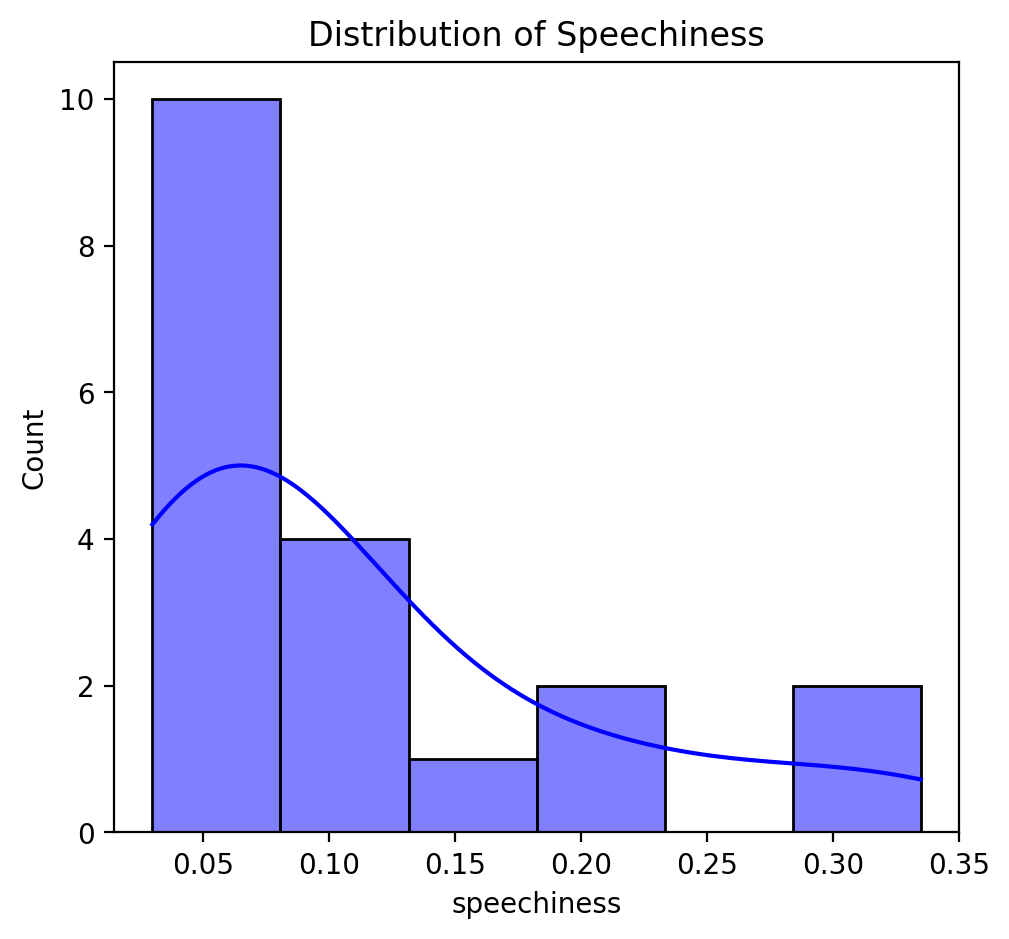

In [26]:
# Distribution of Speechiness and Liveness
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['speechiness'], kde=True, color='blue')
plt.title('Distribution of Speechiness')

C:\Users\ethan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ethan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


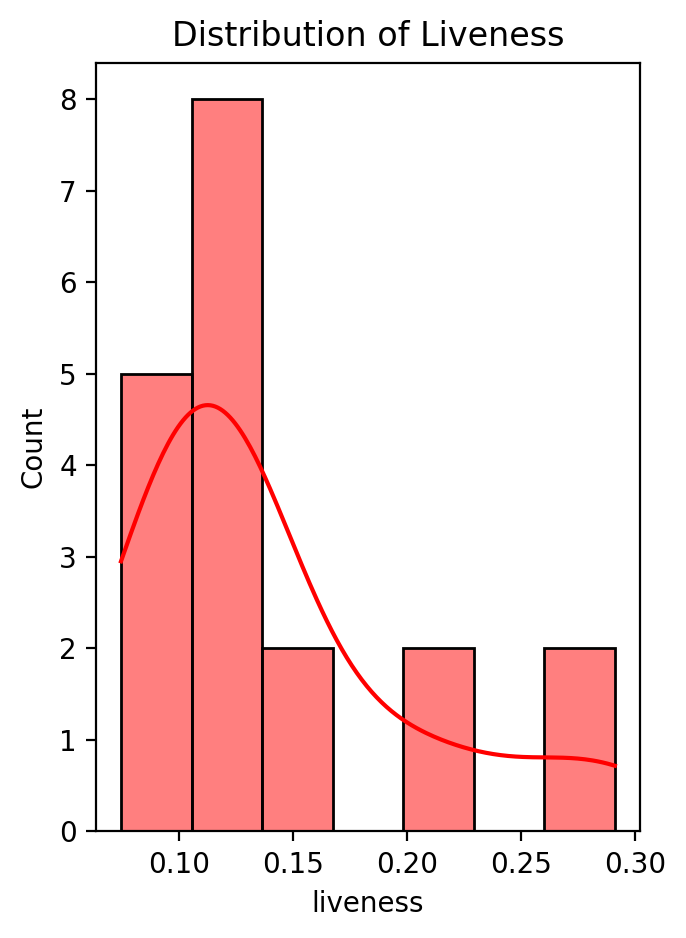

In [27]:
plt.subplot(1, 2, 2)
sns.histplot(df['liveness'], kde=True, color='red')
plt.title('Distribution of Liveness')

plt.tight_layout()
plt.show()

C:\Users\ethan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ethan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ethan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instea

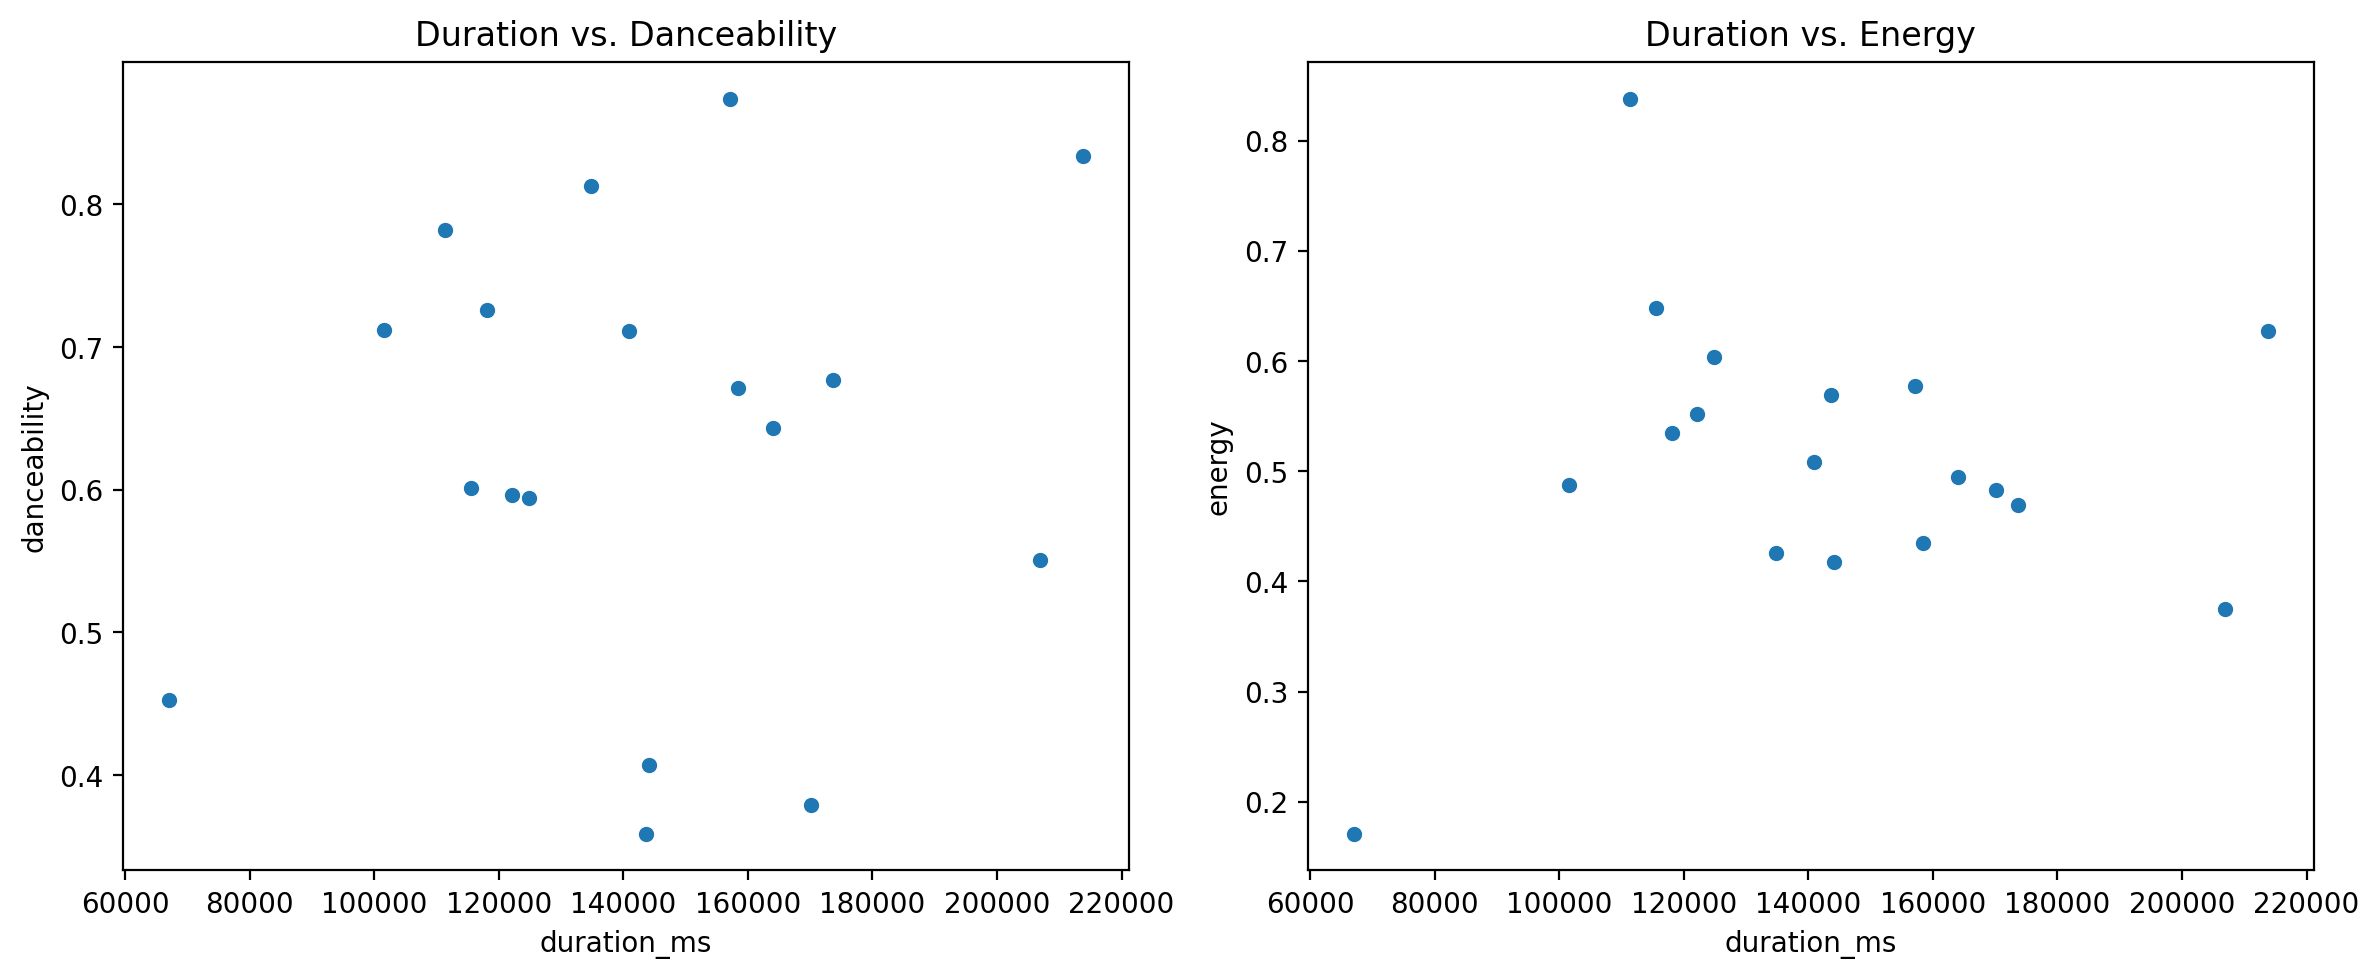

In [28]:
# Duration vs. Danceability and Energy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x='duration_ms', y='danceability', data=df)
plt.title('Duration vs. Danceability')

plt.subplot(1, 2, 2)
sns.scatterplot(x='duration_ms', y='energy', data=df)
plt.title('Duration vs. Energy')

plt.tight_layout()
plt.show()

In [32]:
# 9. Correlation Analysis
# Filtering the DataFrame to only include numerical features for correlation analysis
numerical_features_df = df.select_dtypes(include=[np.number])

# Calculating the correlation matrix for numerical features
numerical_features_correlation = numerical_features_df.corr()

numerical_features_correlation


,Popularity,time_signature,danceability,acousticness,energy,tempo,instrumentalness,loudness,liveness,duration_ms,key,valence,speechiness,mode
Popularity,1.000000,-0.111017,0.198674,-0.233644,0.130080,0.103104,-0.352819,0.431202,0.070998,0.169718,0.025164,0.067857,-0.257653,0.436928
time_signature,-0.111017,1.000000,-0.251697,0.161184,-0.376415,-0.473757,0.206969,-0.210437,-0.429567,0.348103,-0.422909,-0.332511,0.042702,-0.045835
danceability,0.198674,-0.251697,1.000000,-0.025213,0.388907,0.622282,0.070127,0.565497,-0.329774,0.129175,-0.024846,0.626905,-0.103968,0.213450
acousticness,-0.233644,0.161184,-0.025213,1.000000,-0.075524,-0.227758,-0.011554,-0.212258,-0.423965,-0.195478,-0.456133,0.221640,0.104247,0.161090
energy,0.130080,-0.376415,0.388907,-0.075524,1.000000,0.617330,0.187344,0.699968,0.107903,0.068388,0.365298,0.315505,-0.454081,0.335600
tempo,0.103104,-0.473757,0.622282,-0.227758,0.617330,1.000000,-0.006329,0.594094,-0.244372,-0.207197,0.349780,0.393498,-0.095786,0.040920
instrumentalness,-0.352819,0.206969,0.070127,-0.011554,0.187344,-0.006329,1.000000,-0.090937,-0.253898,0.342708,-0.132214,0.250359,-0.230234,-0.161547
loudness,0.431202,-0.210437,0.565497,-0.212258,0.699968,0.594094,-0.090937,1.000000,-0.039570,0.210133,0.365804,0.163099,-0.402414,0.266309
liveness,0.070998,-0.429567,-0.329774,-0.423965,0.107903,-0.244372,-0.253898,-0.039570,1.000000,0.091948,0.466613,-0.281678,-0.070535,0.071519
duration_ms,0.169718,0.348103,0.129175,-0.195478,0.068388,-0.207197,0.342708,0.210133,0.091948,1.000000,-0.292591,-0.038260,-0.180641,-0.092131


In [31]:
# 10. Grouping and Aggregation
# Example: Group by Album and calculate average popularity and energy
grouped = df.groupby('Album').agg({'Popularity': 'mean', 'energy': 'mean'}).reset_index()
grouped

,Album,Popularity,energy
0,BLACKOUT,1.714286,0.552286
1,CALCULATED,0.222222,0.465444
2,Dice of Life,0.000000,0.627000
3,LONGTIME,1.000000,0.469000
4,Reach,0.000000,0.535000


In [14]:
# Replace '2YpbfG8YXAbcNHagReUjNX' with your actual Spotify artist ID
artist_id = '2YpbfG8YXAbcNHagReUjNX'

# Get the artist information from Spotify API
artist_info = sp.artist(artist_id)

# Extract genres from the artist information
genres = artist_info['genres']

print(f"Genres associated with the artist: {', '.join(genres)}")

Genres associated with the artist: 


In [15]:
genres

[]